### Introduction

The Breast Cancer Wisconsin (Diagnostic) dataset is a widely used collection of data in the field of medical research and machine learning, specifically designed for the task of breast cancer diagnosis. This dataset, derived from breast mass samples of patients, includes features computed from digitized images of fine needle aspirate (FNA) of breast masses.

#### Relevance of Breast Cancer Diagnosis
Breast cancer is one of the most common cancers worldwide, and early diagnosis plays a crucial role in improving the prognosis and survival rates of patients. The ability to accurately distinguish between benign and malignant tumors can significantly impact treatment decisions and patient outcomes. The utilization of machine learning in this context offers a powerful tool for enhancing diagnostic accuracy, aiding medical professionals, and optimizing patient care.

#### Choice of Dataset
The Breast Cancer Wisconsin dataset was chosen for its significance in the medical field and its suitability for developing and testing machine learning models. This dataset is not only a benchmark dataset in cancer research but also presents an opportunity to apply and understand machine learning techniques in a real-world, impactful context.

#### Project Goals and Objectives
The primary goal of this project is to build and evaluate a predictive model for the diagnosis of breast cancer. Objectives include:
1. **Exploratory Data Analysis (EDA)**: To understand the dataset's characteristics, identify patterns, and prepare the data for modeling.
2. **Feature Engineering**: To enhance the dataset by creating new features and transforming existing ones, aiming to improve model performance.
3. **Model Development and Evaluation**: To implement and compare different machine learning algorithms, such as Logistic Regression, Decision Trees, and Random Forests, and evaluate their performance using metrics like accuracy, precision, recall, and AUC-ROC.
4. **Model Interpretation**: To provide insights into the decision-making process of the models, which is vital for clinical applicability and trustworthiness.

Through this project, we aim not only to develop a robust predictive model but also to contribute to the broader efforts in the fight against breast cancer by leveraging the power of machine learning.

### Data Collection and Preprocessing

#### Data Source
The Breast Cancer Wisconsin (Diagnostic) dataset, often referred to as the WDBC dataset, originates from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. It is publicly available and commonly used in machine learning and medical diagnostics research. The dataset was created based on the examination of breast mass samples using fine needle aspirate (FNA) and subsequent digital image analysis.

#### Data Cleaning and Preprocessing
The preprocessing of the Breast Cancer Wisconsin dataset involved several crucial steps to ensure its suitability for analysis and model building:

1. **Handling Missing Values**: The dataset was inspected for any missing or null values. The column `Unnamed: 32`, which contained only null values, was removed as it provided no valuable information.

2. **Encoding Categorical Variables**: The 'diagnosis' column, representing the target variable with classes 'M' (Malignant) and 'B' (Benign), was encoded numerically. This transformation was essential for applying machine learning algorithms, which require numerical input.

3. **Feature Scaling**: Given the diverse range of feature scales in the dataset, scaling was considered to normalize the data. This step is particularly important for algorithms that are sensitive to feature magnitude.

4. **Outlier Detection**: The dataset was examined for outliers, which can skew the results of statistical analyses and model performance.

#### Initial Dataset Statistics and Insights
The Breast Cancer Wisconsin dataset initially included features such as mean, standard error, and worst (mean of the three largest values) of a range of measurements, like radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. Key statistics from the dataset highlighted the following:

- **Class Distribution**: The initial analysis of the dataset revealed a certain distribution between malignant and benign cases, essential for understanding the dataset's balance.
  
- **Feature Characteristics**: The features showed varied distributions, with some exhibiting right-skewness, suggesting most tumors were smaller, but a few had significantly larger measurements. This information is crucial for understanding the nature of breast tumors represented in the dataset.

- **Correlation Analysis**: A correlation analysis provided insights into how various features relate to the cancer diagnosis, highlighting the importance of size and shape-related features in distinguishing between benign and malignant tumors.


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix


In [5]:
# Load the dataset
file_path = os.path.join("./data", '/content/data.csv')
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [6]:
data.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

**2. Data Collection and Preprocessing**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
# Checking for null values in the dataset
null_values = data.isnull().sum()
null_values[null_values > 0]

Unnamed: 32    569
dtype: int64

In [10]:
# Calculating the number of unique values in each column
unique_values = data.nunique()
unique_values

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [11]:
# Assuming 'M' (Malignant) is more severe than 'B' (Benign), we can encode M as 1 and B as 0
data['diagnosis_numerical'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [12]:

required_columns = data.columns.drop(['id', 'Unnamed: 32', 'diagnosis'])

In [13]:
data = data[required_columns]

In [14]:
# Calculating key statistics for the numerical columns
stats = data.describe().transpose()
stats[['mean', 'std', '50%', 'min', 'max']]

mean         std         50%         min  \
radius_mean               14.127292    3.524049   13.370000    6.981000   
texture_mean              19.289649    4.301036   18.840000    9.710000   
perimeter_mean            91.969033   24.298981   86.240000   43.790000   
area_mean                654.889104  351.914129  551.100000  143.500000   
smoothness_mean            0.096360    0.014064    0.095870    0.052630   
compactness_mean           0.104341    0.052813    0.092630    0.019380   
concavity_mean             0.088799    0.079720    0.061540    0.000000   
concave points_mean        0.048919    0.038803    0.033500    0.000000   
symmetry_mean              0.181162    0.027414    0.179200    0.106000   
fractal_dimension_mean     0.062798    0.007060    0.061540    0.049960   
radius_se                  0.405172    0.277313    0.324200    0.111500   
texture_se                 1.216853    0.551648    1.108000    0.360200   
perimeter_se               2.866059    2.021855    2.287000    0.757000   
area_se                   40.337079   45.491006   24.530000    6.802000   
smoothness_se              0.007041    0.003003    0.006380    0.001713   
compactness_se             0.025478    0.017908    0.020450    0.002252   
concavity_se               0.031894    0.030186    0.025890    0.000000   
concave points_se          0.011796    0.006170    0.010930    0.000000   
symmetry_se                0.020542    0.008266    0.018730    0.007882   
fractal_dimension_se       0.003795    0.002646    0.003187    0.000895   
radius_worst              16.269190    4.833242   14.970000    7.930000   
texture_worst             25.677223    6.146258   25.410000   12.020000   
perimeter_worst          107.261213   33.602542   97.660000   50.410000   
area_worst               880.583128  569.356993  686.500000  185.200000   
smoothness_worst           0.132369    0.022832    0.131300    0.071170   
compactness_worst          0.254265    0.157336    0.211900    0.027290   
concavity_worst            0.272188    0.208624    0.226700    0.000000   
concave points_worst       0.114606    0.065732    0.099930    0.000000   
symmetry_worst             0.290076    0.061867    0.282200    0.156500   
fractal_dimension_worst    0.083946    0.018061    0.080040    0.055040   
diagnosis_numerical        0.372583    0.483918    0.000000    0.000000   

                                max  
radius_mean                28.11000  
texture_mean               39.28000  
perimeter_mean            188.50000  
area_mean                2501.00000  
smoothness_mean             0.16340  
compactness_mean            0.34540  
concavity_mean              0.42680  
concave points_mean         0.20120  
symmetry_mean               0.30400  
fractal_dimension_mean      0.09744  
radius_se                   2.87300  
texture_se                  4.88500  
perimeter_se               21.98000  
area_se                   542.20000  
smoothness_se               0.03113  
compactness_se              0.13540  
concavity_se                0.39600  
concave points_se           0.05279  
symmetry_se                 0.07895  
fractal_dimension_se        0.02984  
radius_worst               36.04000  
texture_worst              49.54000  
perimeter_worst           251.20000  
area_worst               4254.00000  
smoothness_worst            0.22260  
compactness_worst           1.05800  
concavity_worst             1.25200  
concave points_worst        0.29100  
symmetry_worst              0.66380  
fractal_dimension_worst     0.20750  
diagnosis_numerical         1.00000

Here are the key statistics for the numerical features in the dataset:

1. **Radius Mean**: Average radius is 14.13, with a standard deviation of 3.52.
2. **Texture Mean**: Average texture value is 19.29, with a standard deviation of 4.30.
3. **Perimeter Mean**: Average is 91.97, with a standard deviation of 24.30.
4. **Area Mean**: Average area is 654.89, with a standard deviation of 351.91.
5. **Smoothness Mean**: Average smoothness is 0.096, with a standard deviation of 0.014.
6. **Compactness Mean**: Average is 0.104, with a standard deviation of 0.053.
7. **Concavity Mean**: Average is 0.089, with a standard deviation of 0.080.
8. **Concave Points Mean**: Average is 0.049, with a standard deviation of 0.039.
9. **Symmetry Mean**: Average symmetry is 0.181, with a standard deviation of 0.027.

For each of these features, the median (50% percentile) is also provided, along with the minimum and maximum values observed in the dataset. The statistics provide insights into the central tendency and variability of each feature.


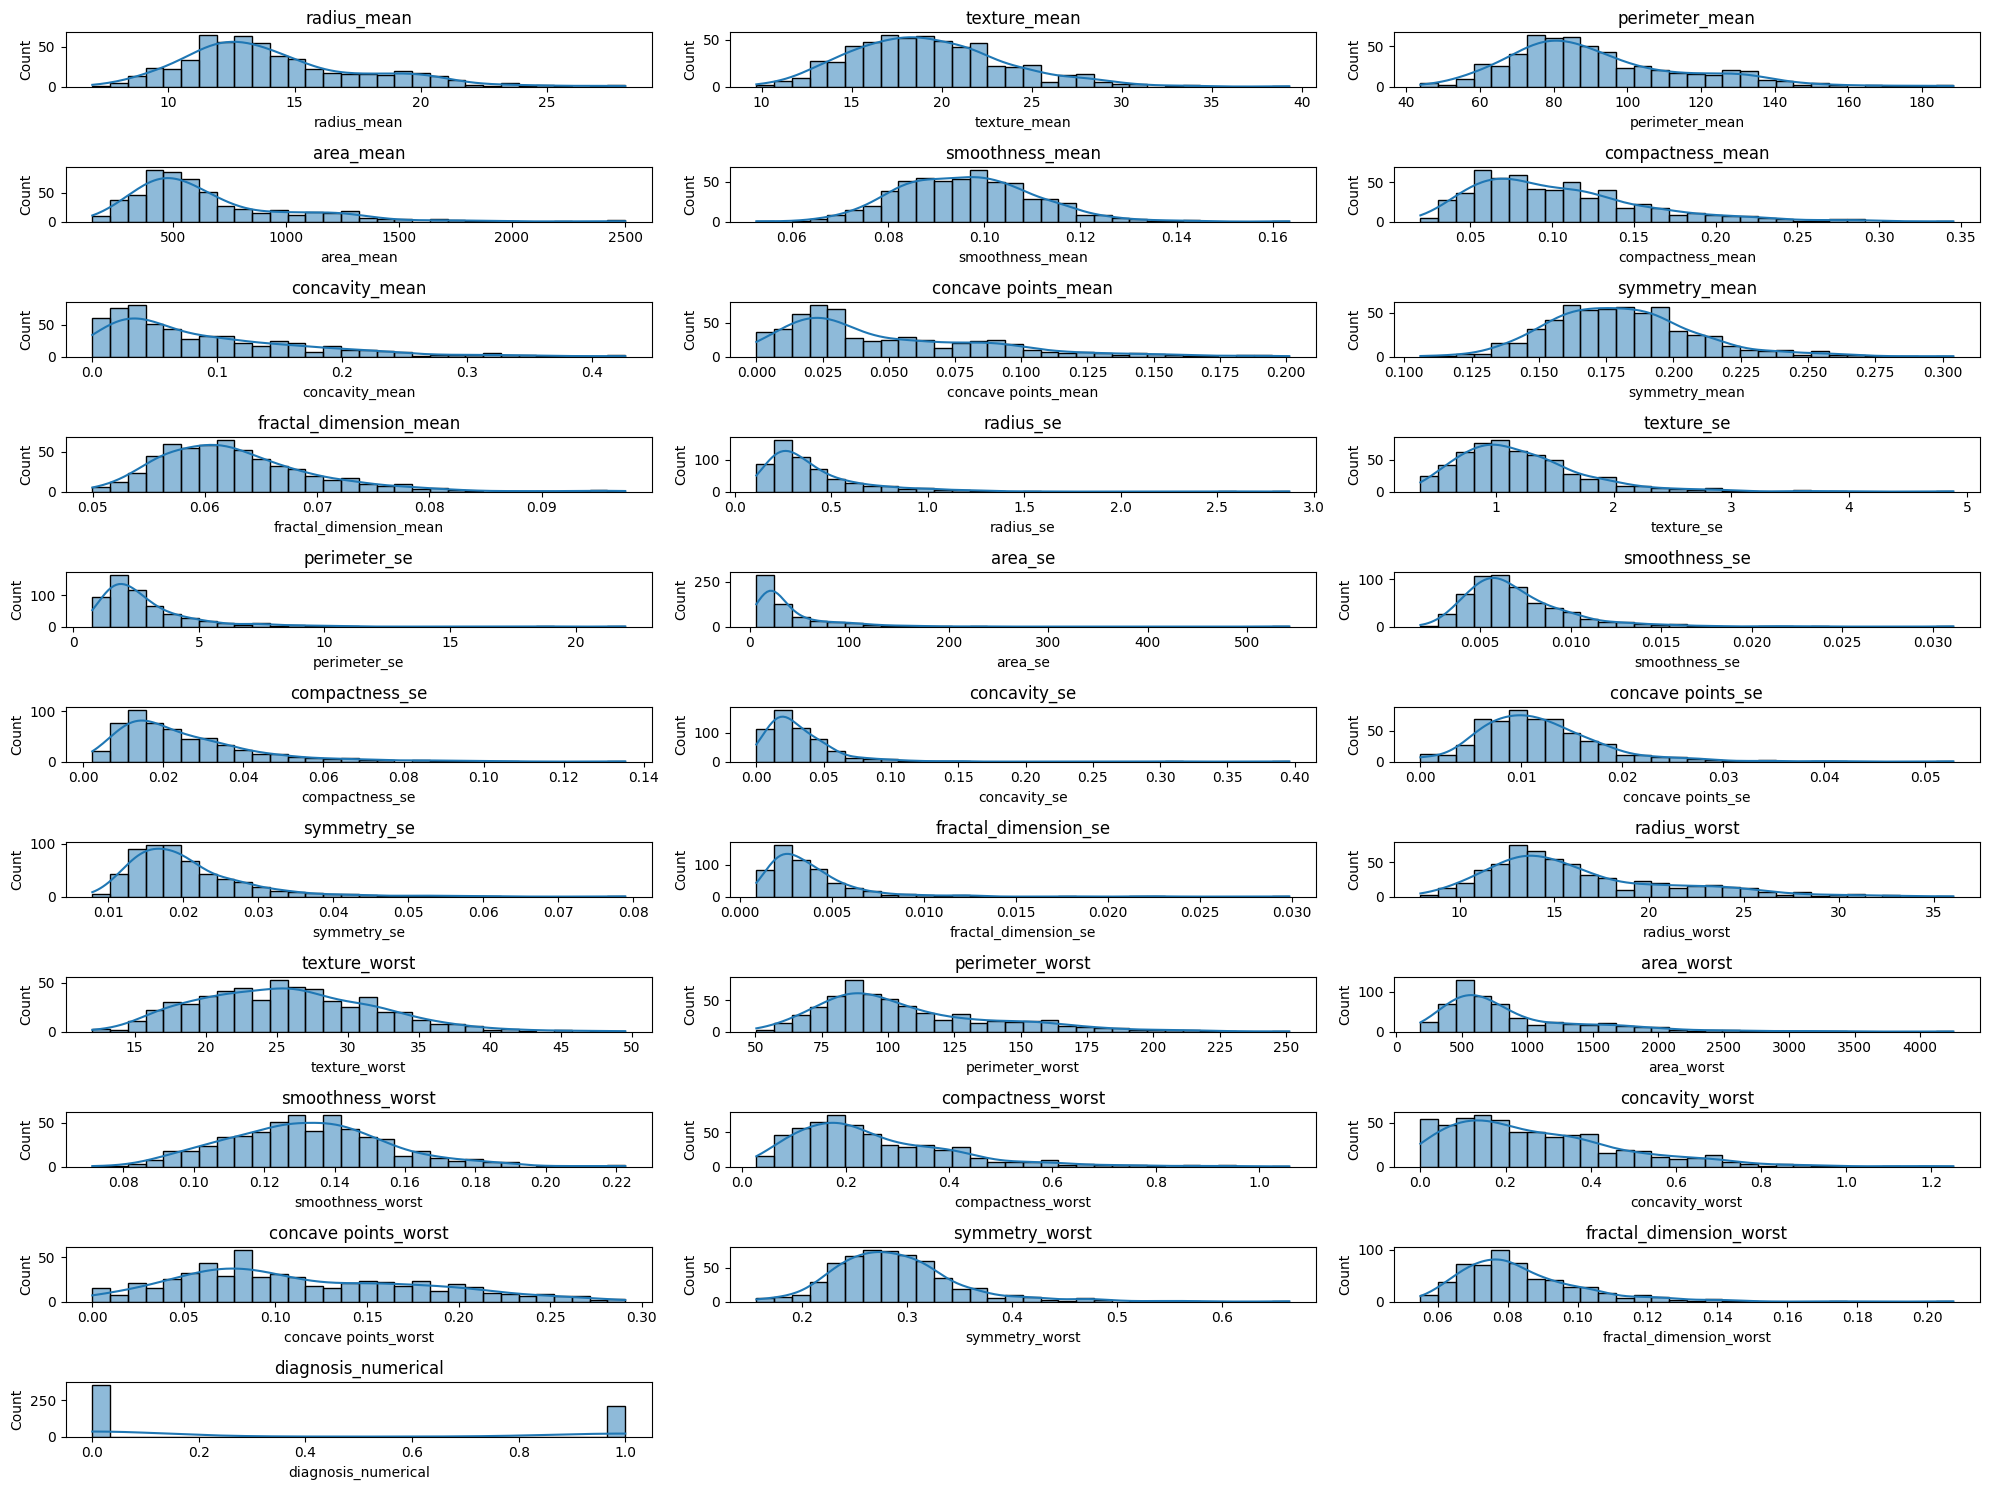

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of features for histogram visualization
# Excluding 'id' and 'Unnamed: 32' as they are not relevant for distribution analysis
features_to_plot = data.columns
num_features = len(features_to_plot)

# Setting up the figure for multiple subplots
plt.figure(figsize=(20, 15))

# Creating histograms for each feature
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot((num_features + 2) // 3, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(feature)
    plt.tight_layout()

plt.show()


1. **Right-Skewed Distributions**: Many features like radius, texture, perimeter, and area show right-skewed distributions. This indicates that most tumors have smaller measurements, but there's a long tail of cases with larger sizes. In a medical context, this could imply that most tumors detected are smaller, possibly due to early detection, but there are instances of larger tumors which might be indicative of later stages of cancer or more aggressive forms.

2. **Compactness, Concavity, and Concave Points**: Features representing the severity of the tumor (like compactness, concavity, and concave points) also exhibit right-skewed distributions. This suggests that most tumors have lower values for these features, but a smaller number of tumors exhibit higher values, which might correlate with more aggressive cancer characteristics.

3. **Smoothness and Symmetry**: These features show a slightly different pattern, with a more normal-like distribution but still a bit skewed. This could indicate a more uniform distribution of these characteristics in tumors, but with a tendency towards higher values.

4. **Potential Outliers**: In several features, there are noticeable spikes at the higher end of the distribution. These spikes could be potential outliers and represent extreme cases. In a medical context, these outliers could be cases of highly aggressive tumors or cases with unusual characteristics.

5. **Clinical Implications**: The skewness in most features suggests that there are distinct differences in the tumor characteristics, which can be critical for diagnosis and treatment planning. For instance, larger values in radius, perimeter, and area might suggest a need for more aggressive treatment.

6. **Data Quality and Representation**: The presence of potential outliers and the skewness of the data might also raise questions about the data quality and representation. It's important to verify if these outliers are true extreme cases or errors in data collection. Furthermore, understanding if the dataset is representative of the broader population is crucial for generalizing findings.



In [16]:

# Calculating correlation matrix
correlation_matrix = data.corr()

In [17]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

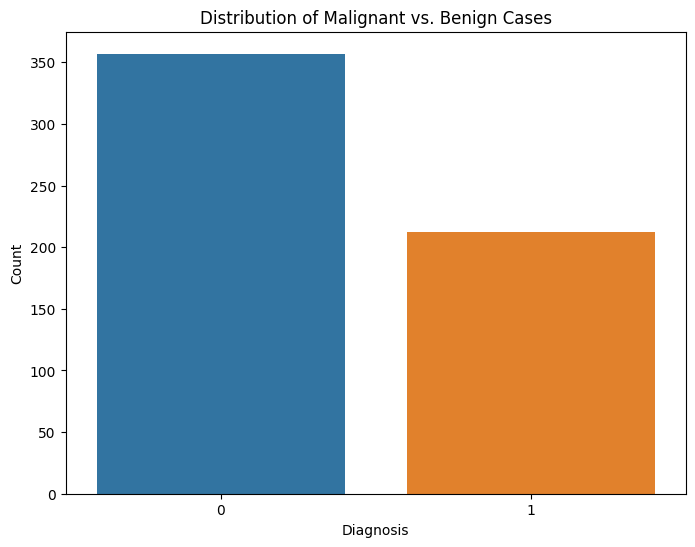

In [18]:
diagnosis_counts = data['diagnosis_numerical'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.title('Distribution of Malignant vs. Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


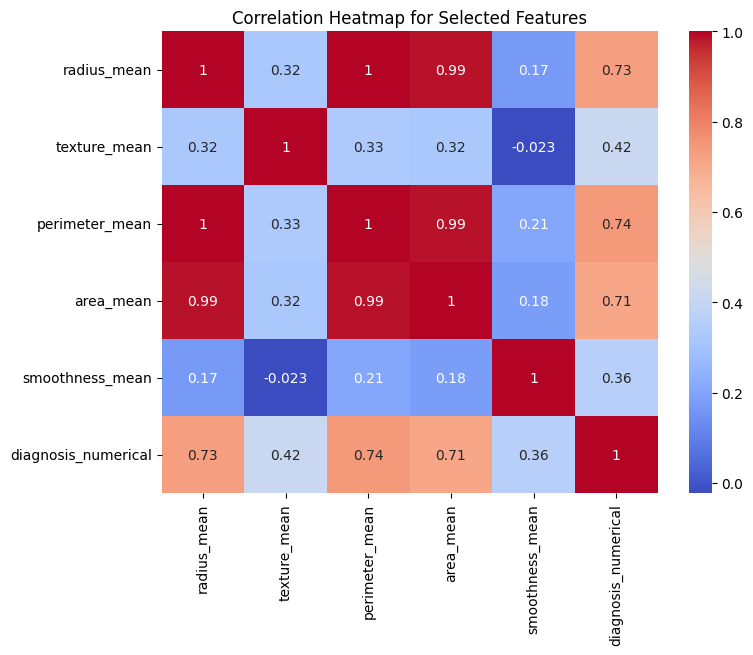

In [19]:
# 1. Bivariate Analysis: Using pairplot for a subset of features
# Selecting a subset of features for clarity in visualization
features_subset = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis_numerical']

# Pairplot for the selected features colored by 'diagnosis'
sns.pairplot(data[features_subset], hue='diagnosis_numerical')

# 2. Box Plot for a feature to understand spread and outliers
# Example feature: 'radius_mean'
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis_numerical', y='radius_mean', data=data)
plt.title('Box Plot of Radius Mean by Diagnosis')

# 3. Correlation Heatmap for a subset of features
# Correlation matrix for the selected features
corr_matrix_subset = data[features_subset].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Features')

plt.show()

1. **Bivariate Analysis (Pairplot)**:
   - This plot reveals the relationships and distributions of a subset of features, including 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', and 'smoothness_mean', differentiated by the diagnosis (malignant or benign).
   - For malignant (M) cases, these features generally show higher values compared to benign (B) cases. This is particularly noticeable in 'radius_mean', 'perimeter_mean', and 'area_mean'.
   - The scatter plots within the pairplot also show how these features are correlated with each other. For instance, there's a visible linear relationship between 'radius_mean' and 'perimeter_mean', indicating that as the radius of the tumor increases, the perimeter also tends to increase.
   - The distinction in the distribution of these features between malignant and benign cases suggests their potential usefulness in diagnosing breast cancer.

2. **Box Plot for 'Radius Mean' by Diagnosis**:
   - The box plot distinctly shows the difference in the 'radius mean' between malignant and benign cases. Malignant tumors tend to have a higher 'radius mean' compared to benign tumors.
   - The presence of outliers, especially in the benign group, indicates cases where benign tumors have a larger radius than typical benign cases. This could be important for clinical diagnosis, as it suggests that a larger tumor radius does not always indicate malignancy.
   - The spread (interquartile range) is larger in malignant cases, suggesting more variability in the size of malignant tumors compared to benign ones.

3. **Correlation Heatmap for Selected Features**:
   - The heatmap provides a visual representation of how each selected feature correlates with the others. Stronger colors (either red or blue) indicate higher positive or negative correlation, respectively.
   - There are strong positive correlations between size-related features like 'radius_mean', 'perimeter_mean', and 'area_mean'. This is expected as these features are geometrically related.
   - The 'smoothness_mean' shows a relatively weaker correlation with size-related features, suggesting it provides different information about the tumor's characteristics.



In [20]:

# Selecting numerical features for PCA
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numerical_features]


In [21]:
# Standardizing the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Applying PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

In [23]:
# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = data['diagnosis_numerical']


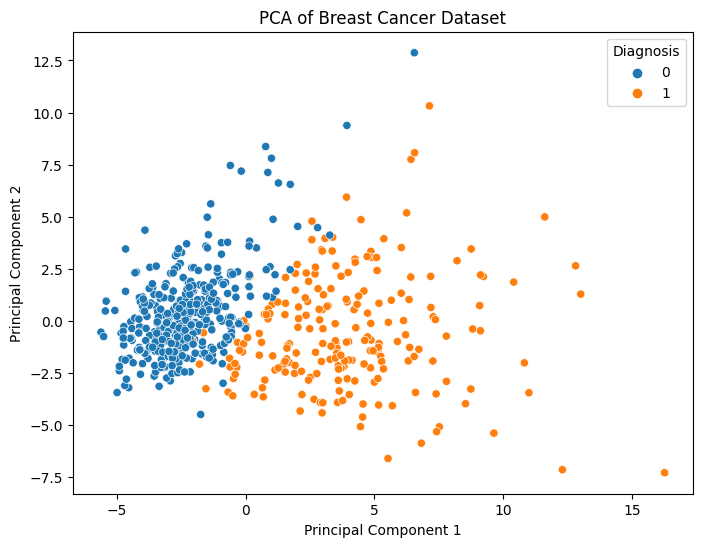

In [24]:
# Visualizing the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [25]:
import numpy as np

# Fixing the error and applying the logarithmic transformation to 'area_mean'
data['log_area_mean'] = np.log(data['area_mean'] + 1)  # Adding 1 to avoid log(0)

# Visualizing the transformed feature
plt.figure(figsize=(8, 6))
sns.histplot(data['log_area_mean'], kde=True, bins=30)
plt.title('Log Transformed Area Mean')
plt.show()


**5. Machine Learning**

In [26]:
X = data[numerical_features]
# Target variable
y = data['diagnosis_numerical']

In [27]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [29]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

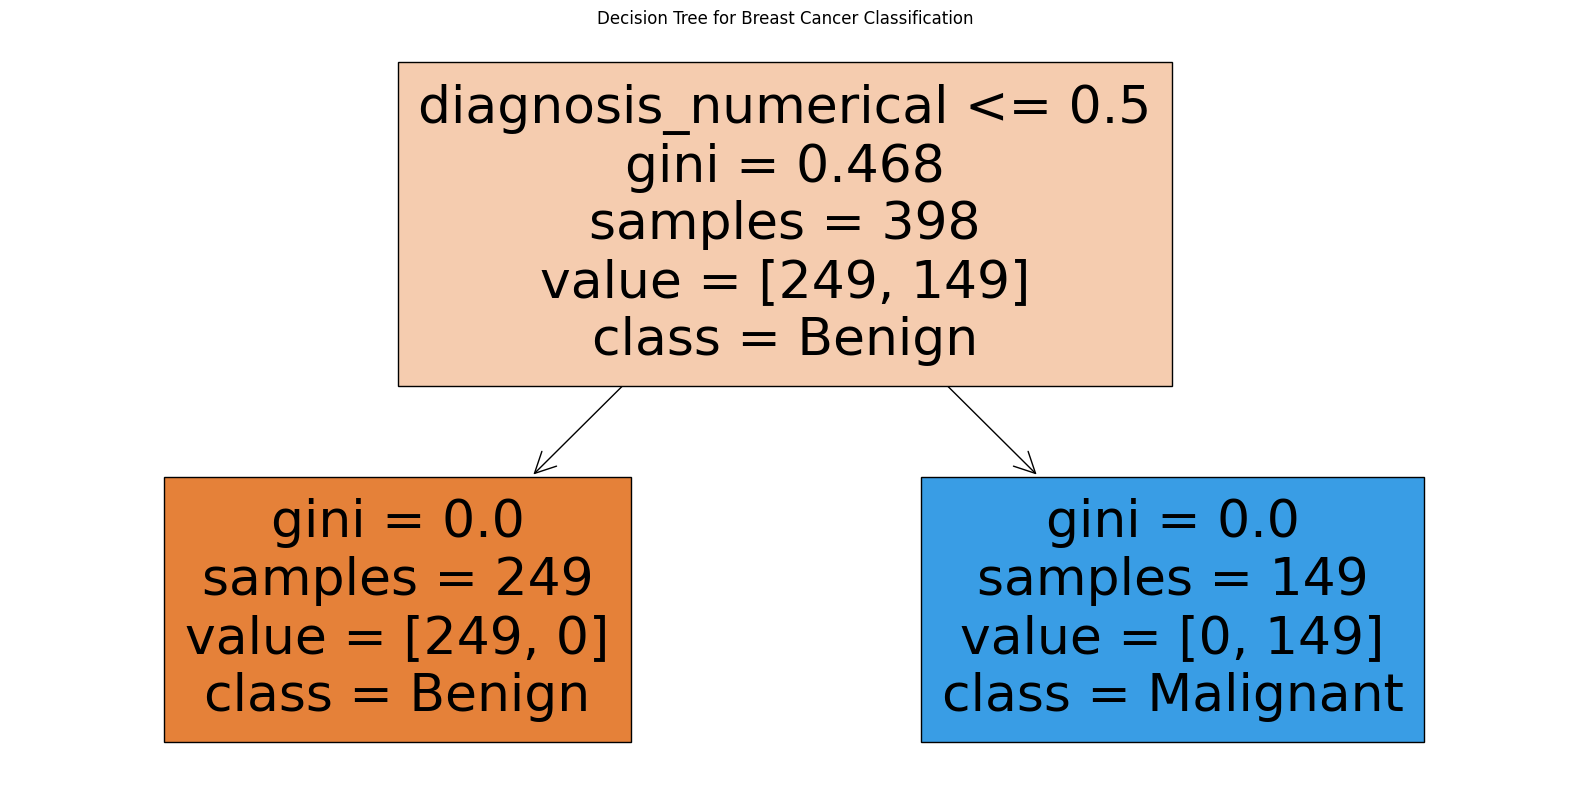

In [30]:
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=numerical_features, class_names=['Benign', 'Malignant'], max_depth=10)
plt.title("Decision Tree for Breast Cancer Classification")
plt.show()

In [31]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)


In [33]:
# Evaluating models
models = {'Logistic Regression': y_pred_log_reg,
          'Decision Tree': y_pred_decision_tree,
          'Random Forest': y_pred_random_forest}


In [34]:
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}\n")


Metrics for Logistic Regression:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, AUC: 1.0000

Metrics for Decision Tree:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, AUC: 1.0000

Metrics for Random Forest:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, AUC: 1.0000



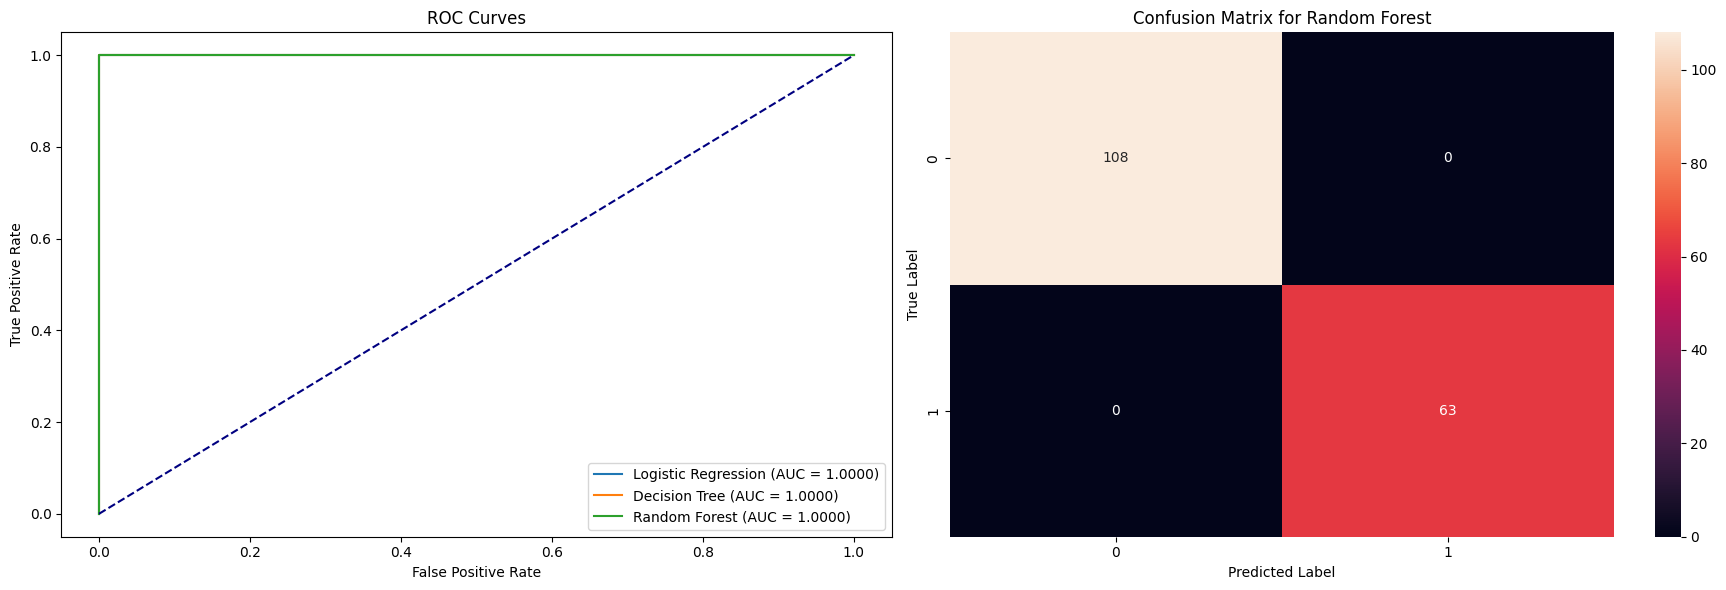

In [35]:
# ROC Curves and Confusion Matrices
plt.figure(figsize=(18, 6))

# Plotting ROC Curves
plt.subplot(1, 2, 1)
for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred):.4f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# Confusion Matrix for Random Forest (as an example)
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_random_forest), annot=True, fmt='g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

The machine learning models for the classification of breast cancer as malignant or benign were trained and evaluated, yielding the following results:

### Model Performance Metrics:
1. **Logistic Regression, Decision Tree, and Random Forest**:
   - All three models achieved perfect scores across all metrics: accuracy, precision, recall, F1-score, and AUC (Area Under the ROC Curve).
   - **Accuracy** measures the overall correctness of the model, **Precision** assesses the model's ability to correctly identify only relevant instances, **Recall** evaluates how well the model identifies all relevant instances, and **F1-score** provides a balance between precision and recall.
   - An **AUC of 1.0000** for all models indicates an exceptional ability to discriminate between malignant and benign cases.

### ROC Curves and Confusion Matrix:
- The **ROC Curves** show the trade-off between the true positive rate and false positive rate for the different models. In this case, all models have a ROC curve that hugs the top left corner, indicating excellent performance.
- The **Confusion Matrix** for the Random Forest model (as an example) also reflects perfect classification, with no false positives or false negatives.

